# Critical Connections in a Network

There are n servers numbered from 0 to n - 1 connected by undirected server-to-server connections forming a network where connections[i] = [ai, bi] represents a connection between servers ai and bi. Any server can reach other servers directly or indirectly through the network.

A critical connection is a connection that, if removed, will make some servers unable to reach some other server.

Return all critical connections in the network in any order.

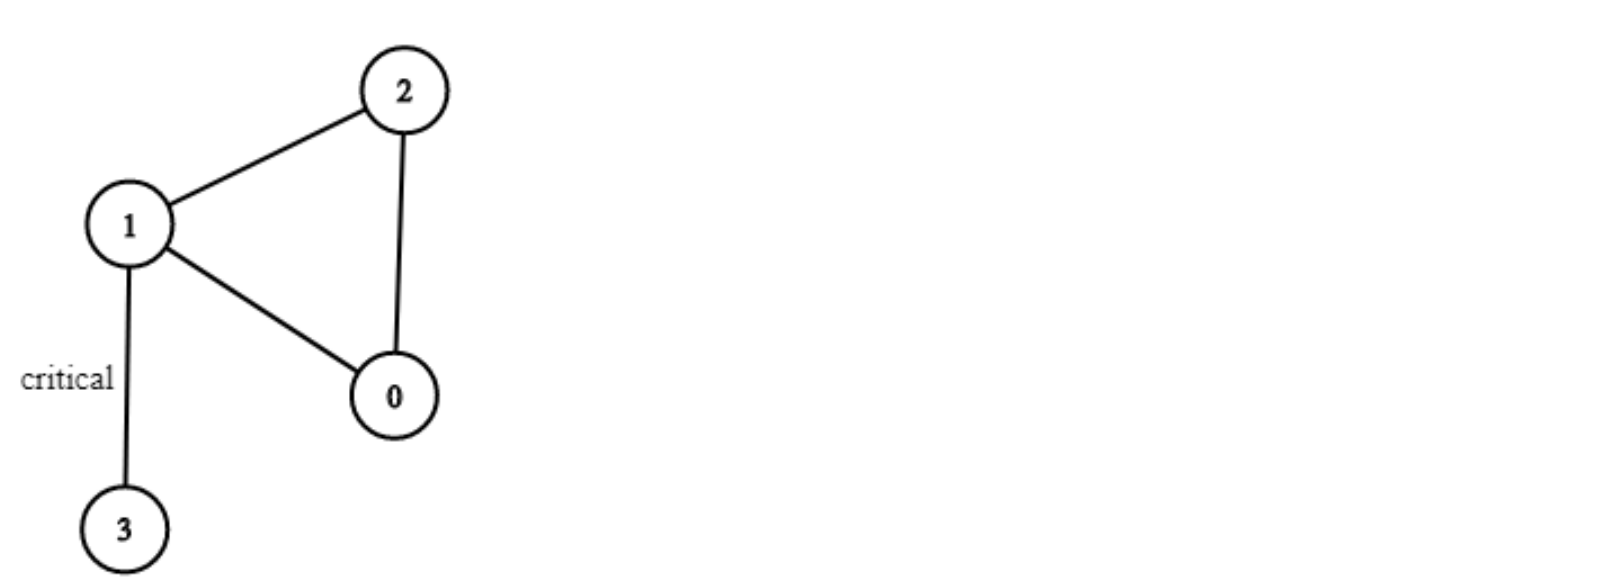

Example 1:

```
Input: n = 4, connections = [[0,1],[1,2],[2,0],[1,3]]
Output: [[1,3]]
Explanation: [[3,1]] is also accepted.
```

Example 2:

```
Input: n = 2, connections = [[0,1]]
Output: [[0,1]]
```

Constraints:

```
2 <= n <= 105
n - 1 <= connections.length <= 105
0 <= ai, bi <= n - 1
ai != bi
There are no repeated connections.
```

In [1]:
from collections import defaultdict

class Solution:
    
    def __init__(self):
        self.rank = {}
        self.graph = defaultdict(list)
        self.conn_dict = {}
        
    # Time O(V + E)
    # Space O(V + E)
    def criticalConnections(self, n: int, connections: list[list[int]]) -> list[list[int]]:

        self.formGraph(n, connections)
        self.dfs(0, 0)
        
        result = []
        for u, v in self.conn_dict:
            result.append([u, v])
        
        return result
            
    def dfs(self, node: int, node_id: int) -> int:
        # if visited
        if self.rank[node] != None:
            return self.rank[node]
        
        self.rank[node] = node_id
        
        lowlink = node_id

        for neighbor in self.graph[node]:
            
            # Skip the parent.
            if self.rank[neighbor] != None and self.rank[neighbor] == node_id - 1:
                continue
            
            # Recurse on the neighbor.    
            neighbor_lowlink = self.dfs(neighbor, node_id + 1)
            
            # Step 1, check if this edge needs to be discarded.
            if neighbor_lowlink <= node_id:
                del self.conn_dict[(min(node, neighbor), max(node, neighbor))]
            
            # Step 2, update the minRank if needed.
            lowlink = min(lowlink, neighbor_lowlink)
        
        return lowlink
    
    def formGraph(self, n: int, connections: list[list[int]]):
        
        # Reinitialize for each test case
        self.rank = {}
        self.graph = defaultdict(list)
        self.conn_dict = {}
        
        # Default rank for unvisited nodes is "null"
        for i in range(n):
            self.rank[i] = None
        
        for edge in connections:
            
            # Bidirectional edges.
            u, v = edge[0], edge[1]
            self.graph[u].append(v)
            self.graph[v].append(u)
            
            self.conn_dict[(min(u, v), max(u, v))] = 1

In [2]:
connections = [[0,1],[1,2],[2,0],[1,3]]
n = 4

expected = [[1,3]]

output = Solution().criticalConnections(n, connections)
print(output)

assert output == expected

[[1, 3]]


In [3]:
connections = [[0,1]]
n = 2

expected = [[0,1]]

output = Solution().criticalConnections(n, connections)
print(output)

assert output == expected

[[0, 1]]


In [4]:
connections = [[1,0],[2,0],[3,2],[4,2],[4,3],[3,0],[4,0]]
n = 5

expected = [[0,1]]

output = Solution().criticalConnections(n, connections)
print(output)

assert output == expected

[[0, 1]]
